# Bank Customer Segmentation

## 1. Problem Statement:

**Unsupervised Learning: Customer Segmentation**<br>
● **Data Source:** Transactional data including frequency, amount, and types of
transactions.<br>
● **Algorithm:** K-Means Clustering or Hierarchical Clustering.<br>

## 2. Import Modules, Load Data & Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

%matplotlib inline
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 15)
#pd.set_option('display.float_format', None)
pd.set_option('display.float_format', '{:.2f}'.format)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/bank_transactions.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [ ]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50


## 3. Data Exploration & Cleaning

In [ ]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1046198.00,1048567.00,1048567.00
mean,115403.54,157087.53,1574.34
std,846485.38,51261.85,6574.74
min,0.00,0.00,0.00
25%,4721.76,124030.00,161.00
50%,16792.18,164226.00,459.03
75%,57657.36,200010.00,1200.00
max,115035495.10,235959.00,1560034.99


In [ ]:
# drop transac ID, Cust ID and transaction time as it's not gonna make impact in the segmenation but may create noise
df.drop(['TransactionID', 'CustomerID', 'TransactionTime'], axis=1, inplace=True)

In [ ]:
# convert Customer DOB to Datetime datatype
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], dayfirst=True)
df['CustomerDOB'] = df['CustomerDOB'].apply(lambda x : x.strftime("%d-%m-%Y") if not pd.isna(x) else np.nan)

In [ ]:
# and also TransactionDate to Datetime datatype
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], dayfirst=True)

In [ ]:
df.head()

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR)
0,10-01-1994,F,JAMSHEDPUR,17819.05,2016-08-02,25.00
1,04-04-2057,M,JHAJJAR,2270.69,2016-08-02,27999.00
2,26-11-1996,F,MUMBAI,17874.44,2016-08-02,459.00
3,14-09-2073,F,MUMBAI,866503.21,2016-08-02,2060.00
4,24-03-1988,F,NAVI MUMBAI,6714.43,2016-08-02,1762.50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   CustomerDOB              1045170 non-null  object        
 1   CustGender               1047467 non-null  object        
 2   CustLocation             1048416 non-null  object        
 3   CustAccountBalance       1046198 non-null  float64       
 4   TransactionDate          1048567 non-null  datetime64[ns]
 5   TransactionAmount (INR)  1048567 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 48.0+ MB


In [ ]:
df.isnull().sum()

,0
CustomerDOB,3397
CustGender,1100
CustLocation,151
CustAccountBalance,2369
TransactionDate,0
TransactionAmount (INR),0


In [ ]:
df['CustomerDOB'].value_counts()

,count
CustomerDOB,
01-01-1800,57339
01-01-1989,809
01-01-1990,784
06-08-1991,699
01-01-1991,666
...,...
24-12-2058,1
25-06-2052,1
06-06-2042,1


In [ ]:
df['TransactionDate'].value_counts()

,count
TransactionDate,
2016-08-07,27261
2016-08-13,26921
2016-08-06,26585
2016-09-04,26564
2016-09-03,26431
2016-09-10,25761
2016-08-14,25596
2016-09-11,25454
2016-08-15,24171


In [ ]:
# check duplicated data
df.duplicated().sum()

np.int64(43898)

In [ ]:
# remove duplicated rows
df.drop_duplicates(inplace=True)

**Findings**
We found several problem that appears from our data. We could point that out into three :
1. `CustomerDOB`, `CustGender`, `CustLocation` and `CustAccountBalance` have relatively high number of missing values
2. `CustomerDOB` has invalid values like "*01-01-1800*" or "*12-02-2067*"
3. Before perform any significant measure, we need to inspect them first by look at the data more carefully

In [ ]:
# check missing values on CustGender
df[df['CustGender'].isna()]

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR)
176,01-01-1800,NaN,NAVI MUMBAI,8512.28,2016-08-12,3449.00
2124,01-01-1800,NaN,BANGALORE,7115.05,2016-10-21,584.06
5061,01-01-1800,NaN,MUMBAI,10669.85,2016-09-22,1500.00
13035,01-01-1800,NaN,MULUND WEST,65989.63,2016-09-26,336.52
14878,01-01-1800,NaN,NAVI MUMBAI,603.00,2016-09-26,1494.00
...,...,...,...,...,...,...
1034579,12-12-2050,NaN,MUMBAI,1091.50,2016-09-18,1168.00
1038102,01-01-1800,NaN,MUMBAI,6516.33,2016-09-18,100.00
1040773,01-01-1800,NaN,MUMBAI,25.00,2016-09-18,100.00
1044782,01-01-1800,NaN,JAIPUR,2222.22,2016-09-18,8335.00


- We found a pattern where if CustGender values missing, so in CustomerDOB values invalid
- We would verify this pattern by add more filter

In [ ]:
df[(df['CustGender'].isna()) & (df['CustomerDOB'] == '01-01-1800')]

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR)
176,01-01-1800,NaN,NAVI MUMBAI,8512.28,2016-08-12,3449.00
2124,01-01-1800,NaN,BANGALORE,7115.05,2016-10-21,584.06
5061,01-01-1800,NaN,MUMBAI,10669.85,2016-09-22,1500.00
13035,01-01-1800,NaN,MULUND WEST,65989.63,2016-09-26,336.52
14878,01-01-1800,NaN,NAVI MUMBAI,603.00,2016-09-26,1494.00
...,...,...,...,...,...,...
1033671,01-01-1800,NaN,NAVI MUMBAI,1294.44,2016-09-18,392.67
1038102,01-01-1800,NaN,MUMBAI,6516.33,2016-09-18,100.00
1040773,01-01-1800,NaN,MUMBAI,25.00,2016-09-18,100.00
1044782,01-01-1800,NaN,JAIPUR,2222.22,2016-09-18,8335.00


- We can assumed that probably caused by an error in bank system record so the data could not stored properly
- Let's check the missing values of `CustLocation` with relation to `CustomerDOB`

In [ ]:
df[(df['CustLocation'].isna()) & (df['CustomerDOB'] == '01-01-1800')]

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR)


- The missing values in location doesn't related to systemic error that happens in gender
- Let's check with the `CustAccountBalance`

In [ ]:
df[(df['CustAccountBalance'].isna()) & (df['CustomerDOB'] == '01-01-1800')]

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR)
46189,01-01-1800,M,NEW DELHI,NaN,2016-08-03,1000.00
52180,01-01-1800,F,BANGALORE,NaN,2016-08-03,706.58
53026,01-01-1800,M,MUMBAI,NaN,2016-08-03,2094.00
60462,01-01-1800,M,NEW DELHI,NaN,2016-08-03,438.00
66458,01-01-1800,M,NAVI MUMBAI,NaN,2016-08-02,1134.00
...,...,...,...,...,...,...
979397,01-01-1800,M,NEW DELHI,NaN,2016-09-15,1000.00
998105,01-01-1800,M,HYDERABAD,NaN,2016-09-14,96.00
1014416,01-01-1800,F,JOGESHWARI WEST MUMBAI,NaN,2016-09-14,570.00
1033830,01-01-1800,M,MUMBAI,NaN,2016-09-18,382.69


- After seen the results above, there is a pattern that same appeared in gender. Where account balance is missing, the date value is **01-01-1800**
- Another explanation that could explain that phenomenon is that probably some customer are refused to sharing account balance information into bank information system

**Treatment (In Order)**
1. Remove gender where the DOB is '01-01-1800'
2. Remove Account Balance where the DOB is '01-01-1800'
3. Remove DOB where DOB is '01-01-1800' and Replace the Rest with "Unidentified"
4. Replace Account Balance with Mean values
5. Replaced location with Mode values
6. Create Age variable from Customer DOB

In [ ]:
df2 = df.copy()
print(f'Number of Missing Values (Before Treatment) : {df.isnull().sum().sum()}')

Number of Missing Values (Before Treatment) : 6626


In [ ]:
# treatment no 1
df2.dropna(subset = ['CustGender'], inplace=True)
print(f'Number of Missing Values : {df2.isnull().sum().sum()}')

Number of Missing Values : 5560


In [ ]:
# treatment no 2
df2.drop(df2[(df2['CustAccountBalance'].isna()) & (df2['CustomerDOB'] == '01-01-1800')].index,
         inplace=True)
print(f'Number of Missing Values : {df2.isnull().sum().sum()}')

Number of Missing Values : 5395


In [ ]:
# treatment no 3
df2.drop(df2[df2['CustomerDOB'] == '01-01-1800'].index, inplace=True)
df2['CustomerDOB'] = df2['CustomerDOB'].fillna('Unidentified')
print(f'Number of Missing Values : {df2.isnull().sum().sum()}')

Number of Missing Values : 2208


In [ ]:
# treatment no 4
mean = df2['CustAccountBalance'].mean(skipna=True)
df2['CustAccountBalance'] = df2['CustAccountBalance'].fillna(mean)
print(f'Number of Missing Values : {df2.isnull().sum().sum()}')

Number of Missing Values : 147


In [ ]:
# treatment no 5
mode = df2['CustLocation'].mode()

In [ ]:
mode

,CustLocation
0,MUMBAI


In [ ]:
df2['CustLocation'] = df2['CustLocation'].fillna('Mumbai')
print(f'Number of Missing Values : {df2.isnull().sum().sum()}')

Number of Missing Values : 0


In [ ]:
# create age variables
year = pd.to_datetime(df2['CustomerDOB'], errors = 'coerce', dayfirst=True).dt.year.values
age = 2016 - year #check difference from 2016 as transactiondate are from 2016
age = age
df2['age'] = age
df2['age'] = df2['age'].abs()

In [ ]:
df2

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),age
0,10-01-1994,F,JAMSHEDPUR,17819.05,2016-08-02,25.00,22.00
1,04-04-2057,M,JHAJJAR,2270.69,2016-08-02,27999.00,41.00
2,26-11-1996,F,MUMBAI,17874.44,2016-08-02,459.00,20.00
3,14-09-2073,F,MUMBAI,866503.21,2016-08-02,2060.00,57.00
4,24-03-1988,F,NAVI MUMBAI,6714.43,2016-08-02,1762.50,28.00
...,...,...,...,...,...,...,...
1048562,08-04-1990,M,NEW DELHI,7635.19,2016-09-18,799.00,26.00
1048563,20-02-1992,M,NASHIK,27311.42,2016-09-18,460.00,24.00
1048564,18-05-1989,M,HYDERABAD,221757.06,2016-09-18,770.00,27.00
1048565,30-08-1978,M,VISAKHAPATNAM,10117.87,2016-09-18,1000.00,38.00


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950561 entries, 0 to 1048566
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CustomerDOB              950561 non-null  object        
 1   CustGender               950561 non-null  object        
 2   CustLocation             950561 non-null  object        
 3   CustAccountBalance       950561 non-null  float64       
 4   TransactionDate          950561 non-null  datetime64[ns]
 5   TransactionAmount (INR)  950561 non-null  float64       
 6   age                      947374 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 58.0+ MB


In [ ]:
df2.isnull().sum()

,0
CustomerDOB,0
CustGender,0
CustLocation,0
CustAccountBalance,0
TransactionDate,0
TransactionAmount (INR),0
age,3187


In [ ]:
df2.dropna(inplace=True)
df2.drop('CustomerDOB', axis=1, inplace=True)

In [ ]:
df2.isnull().sum().sum()

np.int64(0)

In [ ]:
df2.reset_index(drop=True, inplace=True)

In [ ]:
df2.isnull().sum().sum()

np.int64(0)

In [ ]:
df = df2.copy() #moving df2 to original df

In [ ]:
mean_trans = df['TransactionAmount (INR)'].mean()
q25, q75 = percentile(df['TransactionAmount (INR)'], 25), percentile(df['TransactionAmount (INR)'], 75)
iqr = q75 - q25
cutoff = iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff
print(f'Lower :{lower}, Upper {upper}')

Lower :-1311.5, Upper 2612.5


In [ ]:
df[df['TransactionAmount (INR)']>upper]

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),age
1,M,JHAJJAR,2270.69,2016-08-02,27999.00,41.00
12,M,AHMEDABAD,32274.78,2016-08-02,12300.00,38.00
24,M,DELHI,285.76,2016-08-03,5500.00,30.00
30,F,MUMBAI,123781.90,2016-08-03,6800.00,37.00
33,F,GUWAHATI,44627.73,2016-08-03,2999.00,19.00
...,...,...,...,...,...,...
947332,M,AURANGABAD,28247.78,2016-09-18,3500.00,38.00
947335,M,BANGALORE,81699.46,2016-09-18,13450.00,39.00
947355,M,BANGALORE,11247.35,2016-09-18,9363.00,35.00
947362,M,FARIDABAD,436598.03,2016-09-18,5259.00,38.00


In [ ]:
df['TransactionAmount (INR)'] = df['TransactionAmount (INR)'].clip(upper=upper)

In [ ]:
num_clipped = (df['TransactionAmount (INR)'] > upper).sum()
print(f'{num_clipped} rows were above upper bound before clipping')


0 rows were above upper bound before clipping


In [ ]:
df[df['TransactionAmount (INR)']>upper]

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),age


In [ ]:
df[df['TransactionAmount (INR)']<lower]

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),age


In [ ]:
len(df[df['TransactionAmount (INR)']> upper])

0

In [ ]:
mean_acc = df['CustAccountBalance'].mean()
q25, q75 = percentile(df['CustAccountBalance'], 25), percentile(df['CustAccountBalance'], 75)
iqr = q75 - q25
cutoff = iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff

In [ ]:
print(iqr,lower,upper)

50253.75 -70692.125 130322.875


In [ ]:
df[df['CustAccountBalance'] > upper]

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),age
3,F,MUMBAI,866503.21,2016-08-02,2060.00,57.00
27,F,NEW DELHI,298461.05,2016-08-03,500.00,51.00
40,M,KOTA,282455.64,2016-08-03,900.00,26.00
46,F,GURGAON,298357.41,2016-08-05,1388.00,34.00
62,F,MUMBAI,224685.48,2016-08-04,339.92,26.00
...,...,...,...,...,...,...
947334,M,THANE,218207.57,2016-09-18,726.80,26.00
947339,M,IMPERIA THANE WEST,182889.37,2016-09-18,600.00,34.00
947359,F,NEW DELHI,235620.05,2016-09-18,1058.00,55.00
947362,M,FARIDABAD,436598.03,2016-09-18,2612.50,38.00


In [ ]:
df['CustAccountBalance'] = df['CustAccountBalance'].clip(upper=upper)

In [ ]:
len(df[df['CustAccountBalance']> upper])

0

In [ ]:
df.isnull().sum()

,0
CustGender,0
CustLocation,0
CustAccountBalance,0
TransactionDate,0
TransactionAmount (INR),0
age,0


## 4. Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947374 entries, 0 to 947373
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CustGender               947374 non-null  object        
 1   CustLocation             947374 non-null  object        
 2   CustAccountBalance       947374 non-null  float64       
 3   TransactionDate          947374 non-null  datetime64[ns]
 4   TransactionAmount (INR)  947374 non-null  float64       
 5   age                      947374 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 43.4+ MB


In [ ]:
tot_trans = sum(round(df['TransactionAmount (INR)'], 2))
tot_acc = sum(round(df['CustAccountBalance'], 2))
finan_series = pd.Series({'Total Transactions' : tot_trans, 'Total Account' : tot_acc})
finan_report = pd.DataFrame({'Total Transactions' : finan_series[0], 'Total Account Balance' : finan_series[1]}, index = [0])

In [ ]:
finan_report

,Total Transactions,Total Account Balance
0,752165223.62,35690626499.75


In [ ]:
df[['CustAccountBalance', 'TransactionAmount (INR)']].describe()

,CustAccountBalance,TransactionAmount (INR)
count,947374.00,947374.00
mean,37673.22,793.95
std,44831.14,842.56
min,0.00,0.00
25%,4688.50,160.00
50%,16290.09,444.00
75%,54942.25,1141.00
max,130322.88,2612.50


- Total Transactions in year 2016 period reach INR 145+ million
- Total Account Balance Customer Hold in year 2016 reach INR 10+ billion

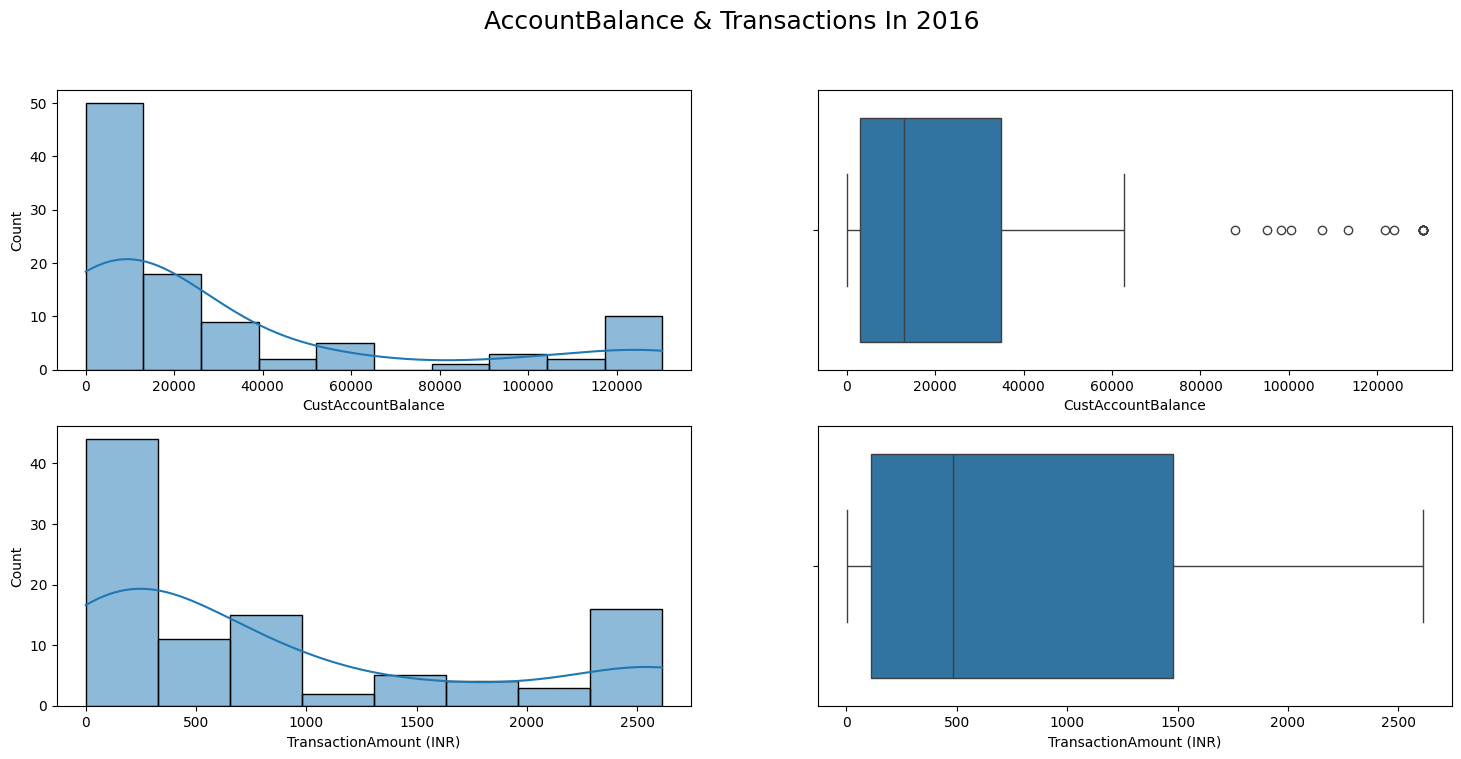

In [ ]:
# question no 2
fig, ax = plt.subplots(2, 2, figsize = (18,8))

# Set the main title of the figure
plt.suptitle('AccountBalance & Transactions In 2016', size = 18)

ax[0,0] = sns.histplot(df[0:100], x='CustAccountBalance', ax=ax[0,0], kde = True)
ax[1,0] = sns.histplot(df[0:100], x='TransactionAmount (INR)', ax=ax[1,0], kde = True)
ax[0,1] = sns.boxplot(df[0:100], x='CustAccountBalance', ax=ax[0,1], orient = 'h')
ax[1,1] = sns.boxplot(df[0:100], x='TransactionAmount (INR)', ax=ax[1,1], orient = 'h')

# Show the figure
plt.show()

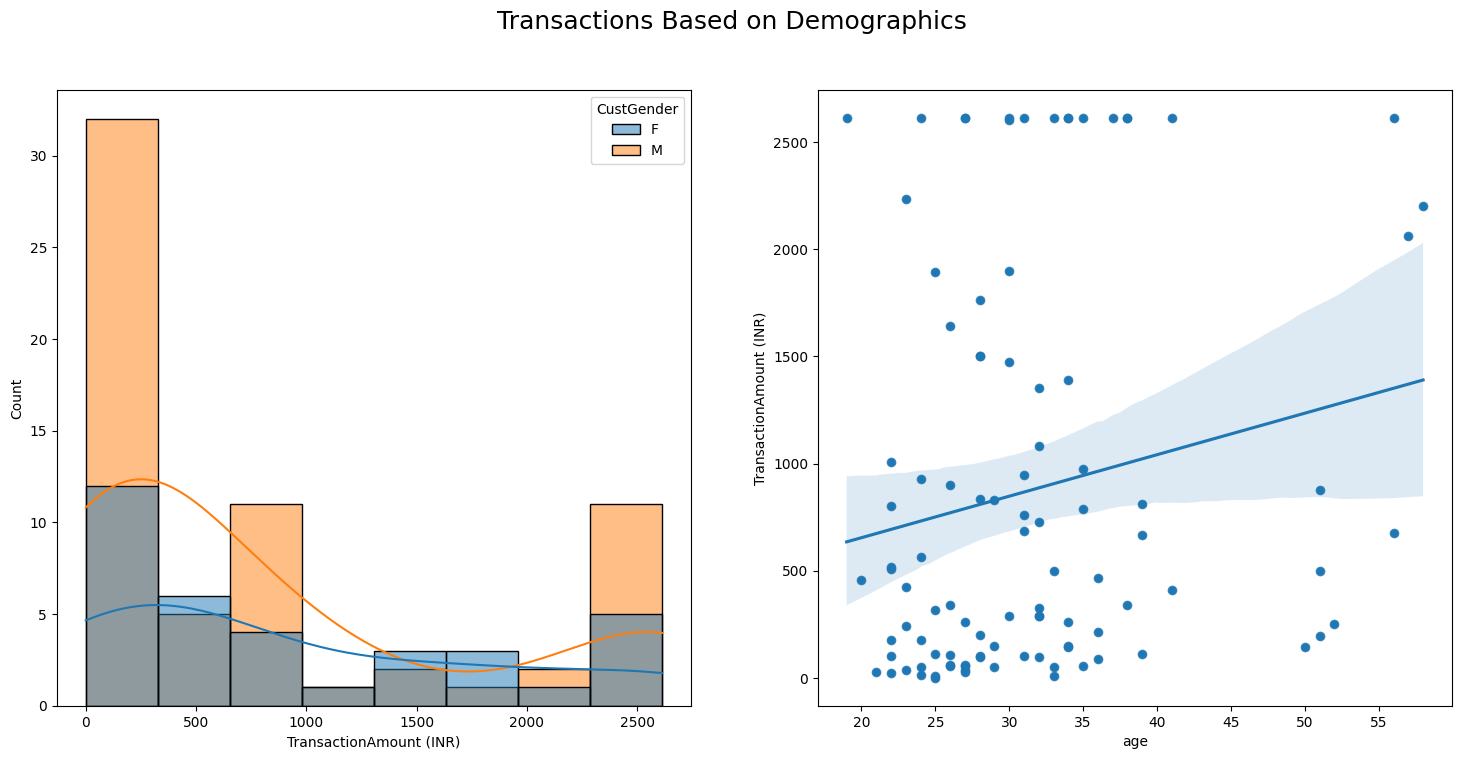

In [ ]:
# question no 2
fig, ax = plt.subplots(1,2, figsize = (18,8))

# Set the main title of the figure
plt.suptitle('Transactions Based on Demographics', size = 18)

ax[0] = sns.histplot(df[0:100], x='TransactionAmount (INR)', ax = ax[0],kde = True, hue ='CustGender')
ax[1] = sns.scatterplot(df[0:100], x='age', y='TransactionAmount (INR)',ax = ax[1])
ax[1] = sns.regplot(df[0:100], x='age', y='TransactionAmount (INR)',ax = ax[1])

# Show the figure
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947374 entries, 0 to 947373
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CustGender               947374 non-null  object        
 1   CustLocation             947374 non-null  object        
 2   CustAccountBalance       947374 non-null  float64       
 3   TransactionDate          947374 non-null  datetime64[ns]
 4   TransactionAmount (INR)  947374 non-null  float64       
 5   age                      947374 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 43.4+ MB


In [ ]:
# Transaction trends in year 2016
df2 = df.copy()
df2.set_index('TransactionDate', inplace=True)
daily_total = df2.groupby(pd.Grouper(freq='W'))['TransactionAmount (INR)'].sum()

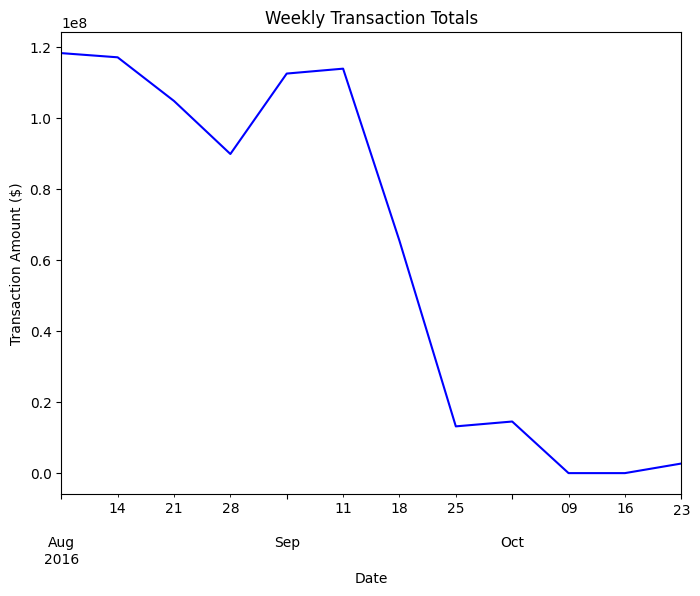

In [ ]:
fig = plt.subplots(figsize = (8, 6))

daily_total.plot(color='blue', linestyle='solid')

plt.title('Weekly Transaction Totals')
plt.xlabel('Date')
plt.ylabel('Transaction Amount ($)')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947374 entries, 0 to 947373
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CustGender               947374 non-null  object        
 1   CustLocation             947374 non-null  object        
 2   CustAccountBalance       947374 non-null  float64       
 3   TransactionDate          947374 non-null  datetime64[ns]
 4   TransactionAmount (INR)  947374 non-null  float64       
 5   age                      947374 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 43.4+ MB


**Insights**

# 5. Data Preprocessing  

In [ ]:
df2 = df.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

colnames = df2.columns
num_columns = df2.select_dtypes(include=['float', 'int']).columns
df2[num_columns] = StandardScaler().fit_transform(df2[num_columns])

In [ ]:
X = df[['CustAccountBalance', 'TransactionAmount (INR)']]

# 6. Elbow Method

In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

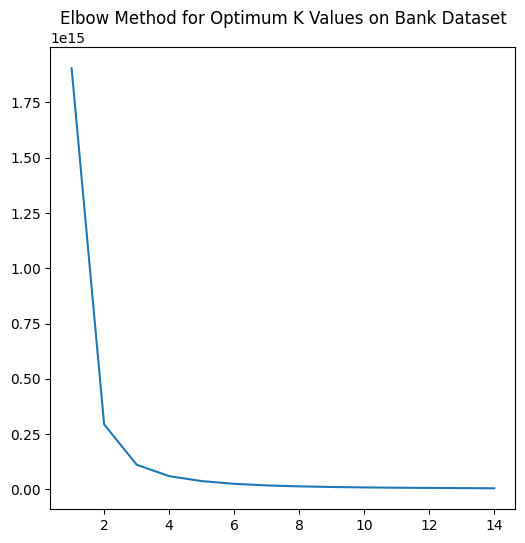

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))

plt.plot(range(1,15), wcss)

plt.title('Elbow Method for Optimum K Values on Bank Dataset')

plt.show()

Optimum k was k = 3

# 7. Unsupervised Learning

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

X['cluster'] = y_kmeans

In [ ]:
X1 = X[X['cluster'] == 0]
X2 = X[X['cluster'] == 1]
X3 = X[X['cluster'] == 2]

In [ ]:
X1

,CustAccountBalance,TransactionAmount (INR),cluster
5,53609.20,676.00,0
10,48429.49,259.00,0
12,32274.78,2612.50,0
13,59950.44,50.00,0
17,32816.17,315.00,0
...,...,...,...
947352,53244.33,322.00,0
947353,38258.28,609.07,0
947357,39293.72,385.00,0
947358,79257.14,1437.00,0


In [ ]:
len(X1), len(X2), len(X3)

(171194, 171932, 604248)

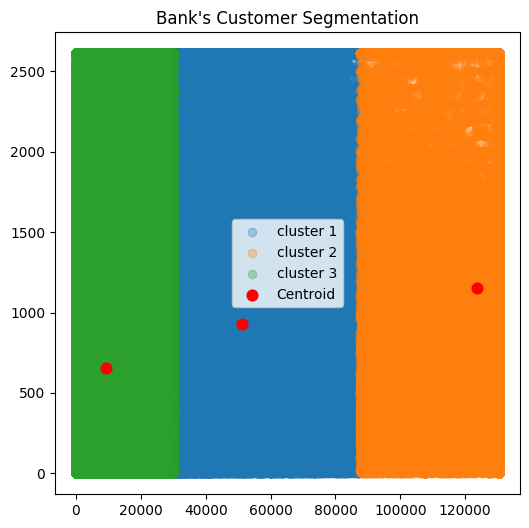

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))

plt.title("Bank's Customer Segmentation")

plt.scatter(X1.iloc[:,0], X1.iloc[:, 1], label = 'cluster 1', alpha = 0.3)
plt.scatter(X2.iloc[:,0], X2.iloc[:, 1], label = 'cluster 2', alpha = 0.3)
plt.scatter(X3.iloc[:,0], X3.iloc[:, 1], label = 'cluster 3', alpha = 0.3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red',
           label = 'Centroid', s= 60)

plt.legend()
plt.show()

In [ ]:
df['Cluster'] = X['cluster']

In [ ]:
clust_count = df['Cluster'].value_counts()

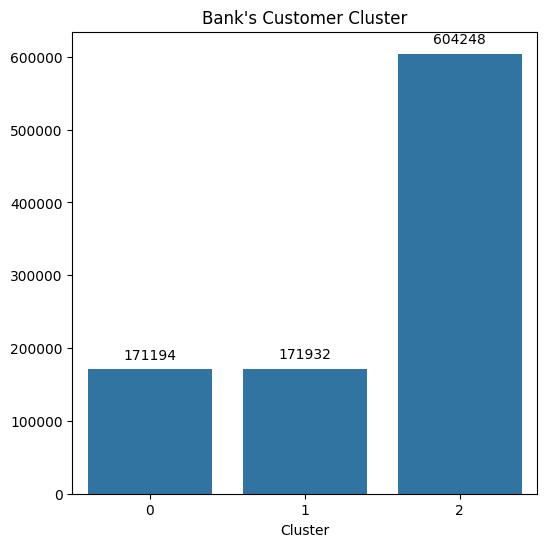

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))

plt.title("Bank's Customer Cluster")

ax = sns.barplot(x = clust_count.index, y = clust_count.values)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

# 8. Identify Bank Customer Demography from Each Cluster

In [ ]:
clust1 = df[df['Cluster'] == 0]
clust2 = df[df['Cluster'] == 1]
clust3 = df[df['Cluster'] == 2]

[Text(0, 0, 'MUMBAI'),
 Text(1, 0, 'NEW DELHI'),
 Text(2, 0, 'GURGAON'),
 Text(3, 0, 'BANGALORE'),
 Text(4, 0, 'DELHI'),
 Text(5, 0, 'NOIDA'),
 Text(6, 0, 'CHENNAI'),
 Text(7, 0, 'PUNE'),
 Text(8, 0, 'KOLKATA'),
 Text(9, 0, 'THANE'),
 Text(10, 0, 'HYDERABAD'),
 Text(11, 0, 'GHAZIABAD'),
 Text(12, 0, 'AHMEDABAD'),
 Text(13, 0, 'NAVI MUMBAI'),
 Text(14, 0, 'FARIDABAD'),
 Text(15, 0, 'CHANDIGARH'),
 Text(16, 0, 'JAIPUR'),
 Text(17, 0, 'SURAT'),
 Text(18, 0, 'LUCKNOW'),
 Text(19, 0, 'MOHALI')]

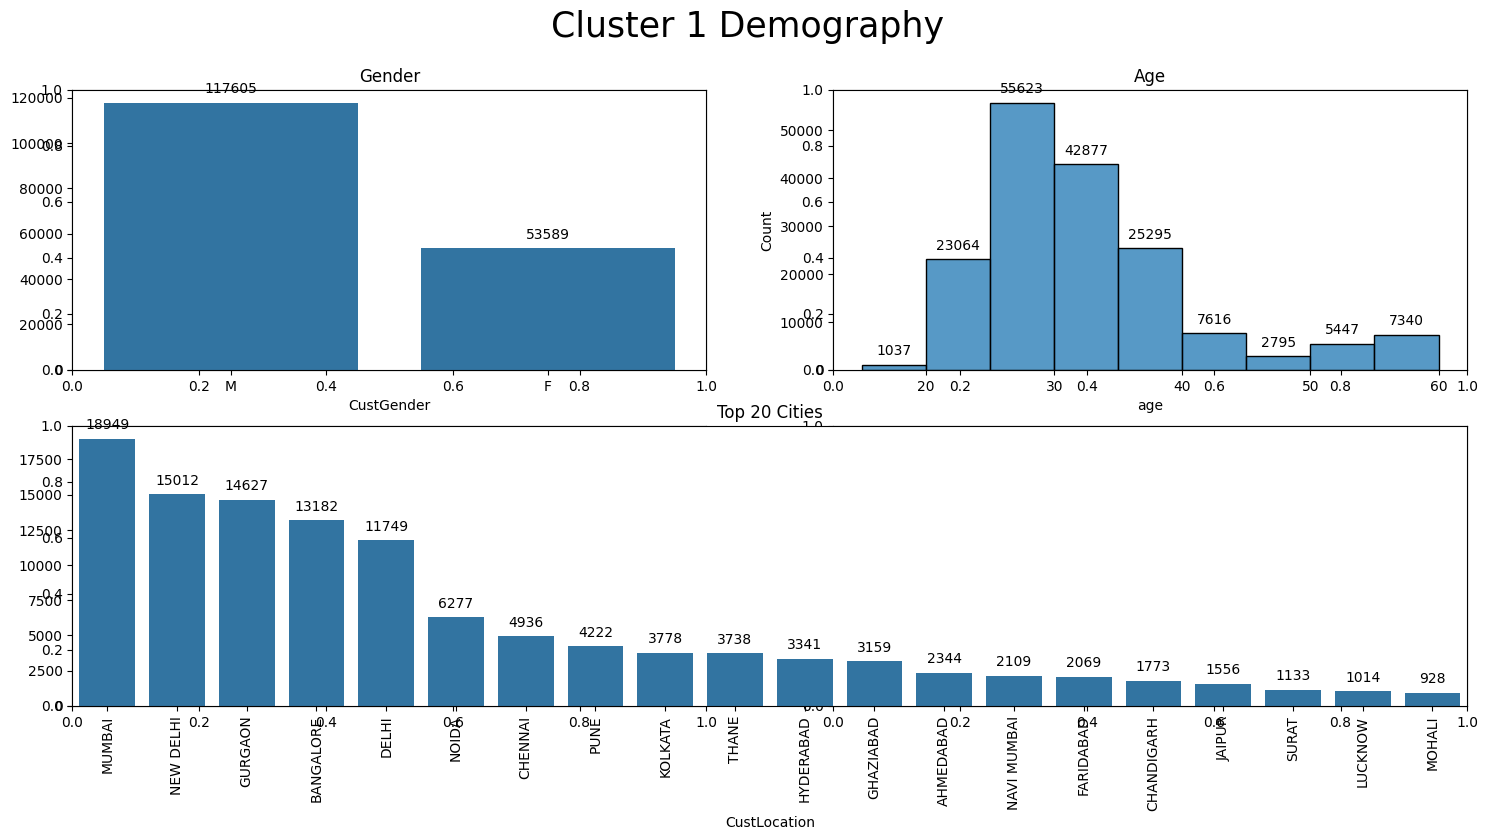

In [ ]:
# identify cluster1
fig, ax = plt.subplots(2, 2, figsize = (18,8))
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

grid_shape = (2, 2)

plt.suptitle("Cluster 1 Demography", size = 25)

ax1 = plt.subplot2grid(grid_shape, (0, 0))
ax1 = sns.barplot(x=clust1['CustGender'].value_counts().index, y = clust1['CustGender'].value_counts().values)
ax1.set_title('Gender')

ax2 = plt.subplot2grid(grid_shape, (0, 1))
ax2 = sns.histplot(clust1['age'], bins = bins)
ax2.set_title('Age')

ax3 = plt.subplot2grid(grid_shape, (1, 0), colspan=2)
ax3 = sns.barplot(x=clust1['CustLocation'].value_counts()[0:20].index, y = clust1['CustLocation'].value_counts()[0:20].values)
ax3.set_title('Top 20 Cities')


for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

ax3.set_xticklabels(clust1['CustLocation'].value_counts()[0:20].index, rotation=90)

[Text(0, 0, 'MUMBAI'),
 Text(1, 0, 'NEW DELHI'),
 Text(2, 0, 'GURGAON'),
 Text(3, 0, 'BANGALORE'),
 Text(4, 0, 'DELHI'),
 Text(5, 0, 'NOIDA'),
 Text(6, 0, 'CHENNAI'),
 Text(7, 0, 'PUNE'),
 Text(8, 0, 'KOLKATA'),
 Text(9, 0, 'THANE'),
 Text(10, 0, 'HYDERABAD'),
 Text(11, 0, 'GHAZIABAD'),
 Text(12, 0, 'AHMEDABAD'),
 Text(13, 0, 'NAVI MUMBAI'),
 Text(14, 0, 'FARIDABAD'),
 Text(15, 0, 'CHANDIGARH'),
 Text(16, 0, 'JAIPUR'),
 Text(17, 0, 'SURAT'),
 Text(18, 0, 'LUCKNOW'),
 Text(19, 0, 'MOHALI')]

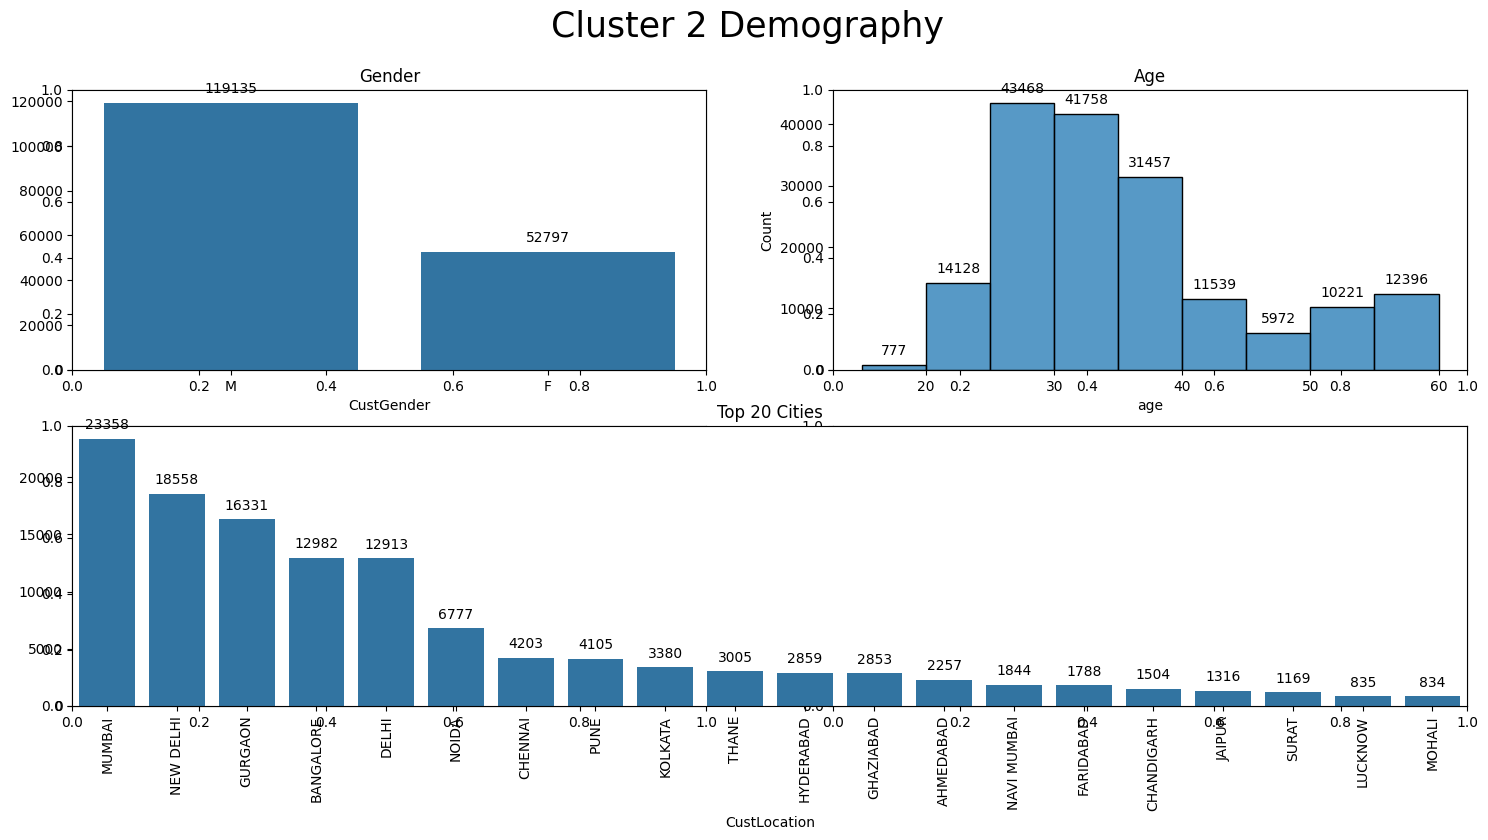

In [ ]:
# identify cluster2
fig, ax = plt.subplots(2, 2, figsize = (18,8))
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

grid_shape = (2, 2)

plt.suptitle("Cluster 2 Demography", size = 25)

ax1 = plt.subplot2grid(grid_shape, (0, 0))
ax1 = sns.barplot(x=clust2['CustGender'].value_counts().index, y = clust2['CustGender'].value_counts().values)
ax1.set_title('Gender')

ax2 = plt.subplot2grid(grid_shape, (0, 1))
ax2 = sns.histplot(clust2['age'], bins = bins)
ax2.set_title('Age')

ax3 = plt.subplot2grid(grid_shape, (1, 0), colspan=2)
ax3 = sns.barplot(x=clust2['CustLocation'].value_counts()[0:20].index, y = clust2['CustLocation'].value_counts()[0:20].values)
ax3.set_title('Top 20 Cities')

for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

ax3.set_xticklabels(clust1['CustLocation'].value_counts()[0:20].index, rotation=90)

[Text(0, 0, 'MUMBAI'),
 Text(1, 0, 'NEW DELHI'),
 Text(2, 0, 'GURGAON'),
 Text(3, 0, 'BANGALORE'),
 Text(4, 0, 'DELHI'),
 Text(5, 0, 'NOIDA'),
 Text(6, 0, 'CHENNAI'),
 Text(7, 0, 'PUNE'),
 Text(8, 0, 'KOLKATA'),
 Text(9, 0, 'THANE'),
 Text(10, 0, 'HYDERABAD'),
 Text(11, 0, 'GHAZIABAD'),
 Text(12, 0, 'AHMEDABAD'),
 Text(13, 0, 'NAVI MUMBAI'),
 Text(14, 0, 'FARIDABAD'),
 Text(15, 0, 'CHANDIGARH'),
 Text(16, 0, 'JAIPUR'),
 Text(17, 0, 'SURAT'),
 Text(18, 0, 'LUCKNOW'),
 Text(19, 0, 'MOHALI')]

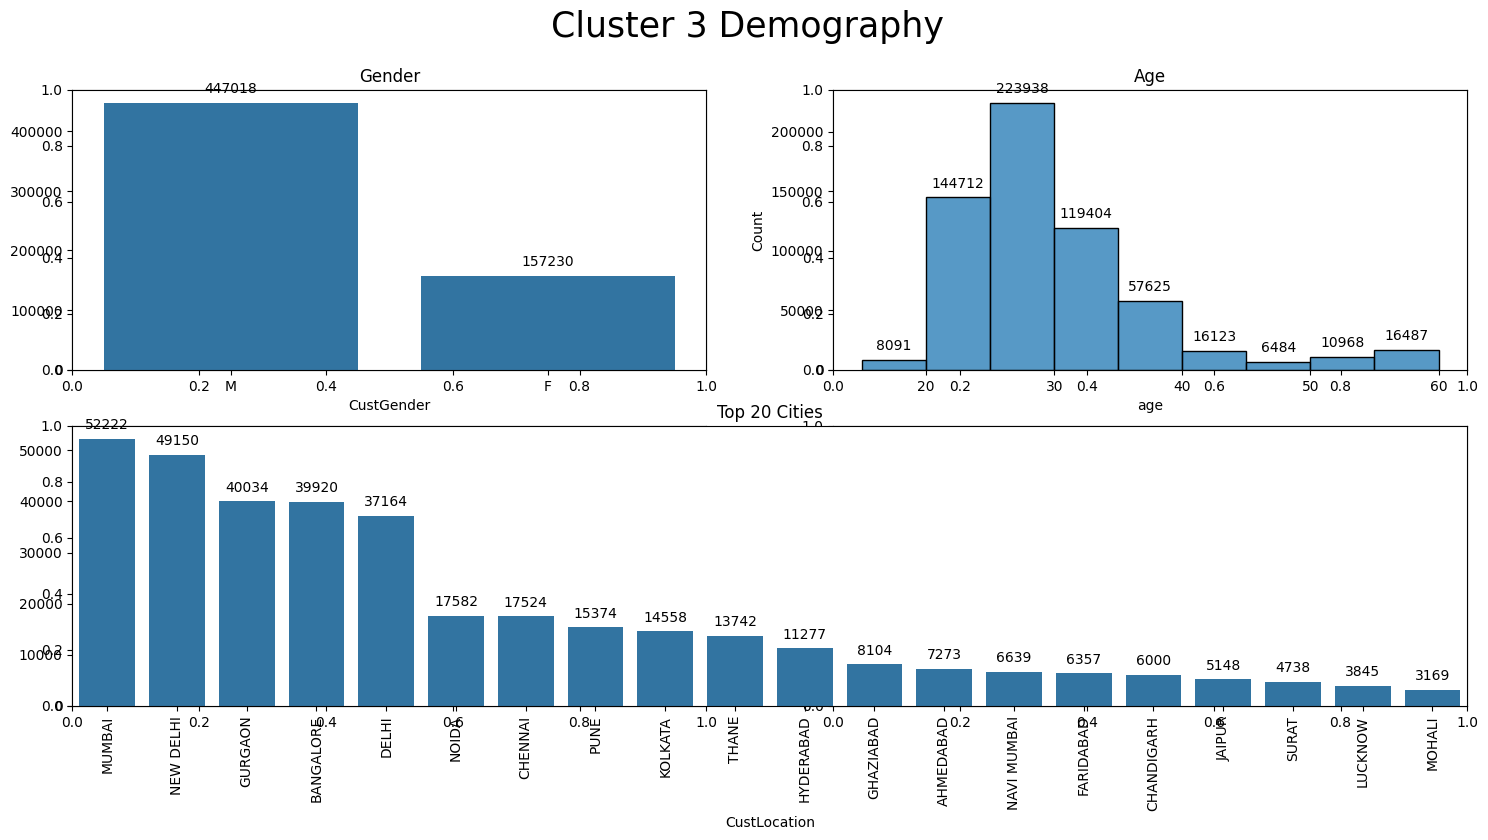

In [ ]:
# identify cluster3
fig, ax = plt.subplots(2, 2, figsize = (18,8))
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

grid_shape = (2, 2)

plt.suptitle("Cluster 3 Demography", size = 25)

ax1 = plt.subplot2grid(grid_shape, (0, 0))
ax1 = sns.barplot(x=clust3['CustGender'].value_counts().index, y = clust3['CustGender'].value_counts().values)
ax1.set_title('Gender')

ax2 = plt.subplot2grid(grid_shape, (0, 1))
ax2 = sns.histplot(clust3['age'], bins = bins)
ax2.set_title('Age')

ax3 = plt.subplot2grid(grid_shape, (1, 0), colspan=2)
ax3 = sns.barplot(x=clust3['CustLocation'].value_counts()[0:20].index, y = clust3['CustLocation'].value_counts()[0:20].values)
ax3.set_title('Top 20 Cities')


for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

ax3.set_xticklabels(clust1['CustLocation'].value_counts()[0:20].index, rotation=90)

# Conclusion
1. Bank X has 3 different group of customers. Which if clusterized into different group using resulting a customer group which has similar transaction amount, but has significant different from account balance as following :
    - Cluster 1 = Low Amount account balance
    - Cluster 2 = Medium Amount account balance
    - Cluster 3 = High Amount account balance
2. Further analysis by demographics, there is not much differentiation from gender and location except by age group. Specific on Young cusomters (20 - 25 year old). Where :
    - Cluster 1 = Has a moderate number of young customer compared to cluster 1 & cluster 3
    - Cluster 2 = Has a lowest number of young customer compared to cluster 1 & cluster 3
    - Cluster 3 = Has a highest number of young customer compared to cluster 1 & cluster 3
3. This analysis could be used by marketing and product team to customize financial product that could attract for each cluster